# Question and Answer Chat Bots

## Loading the Data

We will be working with the Babi Data Set from Facebook Research.

Full Details: https://research.fb.com/downloads/babi/

- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698


In [1]:
import pickle
import numpy as np

In [2]:
with open('./UPDATED_NLP_COURSE/06-Deep-Learning/train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('./UPDATED_NLP_COURSE/06-Deep-Learning/test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [4]:
type(train_data)

list

In [5]:
type(test_data)

list

In [6]:
len(train_data)

10000

In [7]:
len(test_data)

1000

In [8]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [9]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


Data consists of tuples with a set of statements, a question based on the statements, and a response.

In [10]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [11]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [12]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [13]:
train_data[0][2]

'no'

In [14]:
all_data = test_data + train_data

In [15]:
len(all_data)

11000

## Vectorizing the Data

Get only unique words in dataset

In [16]:
vocab = set()

for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [17]:
vocab.add('no')
vocab.add('yes')

In [18]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [19]:
vocab_len = len(vocab) + 1

In [20]:
vocab_len

38

In [21]:
# get longest story
all_story_lens = [len(data[0]) for data in all_data]

In [22]:
all_story_lens

[12,
 23,
 35,
 47,
 59,
 13,
 26,
 37,
 50,
 62,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 47,
 59,
 12,
 25,
 36,
 48,
 59,
 12,
 26,
 39,
 51,
 63,
 13,
 24,
 37,
 50,
 62,
 13,
 26,
 38,
 50,
 63,
 13,
 25,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 64,
 13,
 25,
 37,
 50,
 62,
 13,
 25,
 37,
 50,
 61,
 12,
 25,
 38,
 50,
 62,
 12,
 25,
 37,
 50,
 61,
 12,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 37,
 49,
 60,
 13,
 25,
 39,
 51,
 64,
 12,
 25,
 37,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 62,
 13,
 25,
 37,
 50,
 62,
 12,
 23,
 35,
 47,
 59,
 12,
 25,
 37,
 48,
 73,
 12,
 24,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 62,
 14,
 26,
 37,
 49,
 62,
 12,
 23,
 35,
 48,
 59,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 37,
 49,
 61,
 12,
 25,
 37,
 50,
 62,
 12,
 24,
 36,
 47,
 58,
 12,
 24,
 36,
 48,
 61,
 25,
 38,
 50,
 62,
 74,
 13,
 25,
 37,
 49,
 62,
 12,
 24,
 37,
 49,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 61,
 12,
 25,
 36,
 50,
 62,


In [23]:
max_story_len = max(all_story_lens)

In [24]:
max_story_len

156

In [25]:
max_question_len = max([len(data[1]) for data in all_data])

In [26]:
max_question_len

6

In [27]:
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [28]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [29]:
tokenizer.word_index

{'?': 1,
 'daniel': 2,
 'apple': 3,
 'travelled': 4,
 'back': 5,
 'journeyed': 6,
 'down': 7,
 'yes': 8,
 'bedroom': 9,
 'football': 10,
 'to': 11,
 'no': 12,
 'sandra': 13,
 'picked': 14,
 'got': 15,
 '.': 16,
 'garden': 17,
 'grabbed': 18,
 'kitchen': 19,
 'put': 20,
 'bathroom': 21,
 'the': 22,
 'there': 23,
 'milk': 24,
 'took': 25,
 'left': 26,
 'dropped': 27,
 'hallway': 28,
 'mary': 29,
 'office': 30,
 'moved': 31,
 'discarded': 32,
 'john': 33,
 'up': 34,
 'in': 35,
 'is': 36,
 'went': 37}

In [30]:
train_story_text = []
train_question_text = []
train_answers = []

In [31]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [32]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [33]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [34]:
len(train_story_seq)

10000

In [35]:
train_story_seq

[[29, 31, 11, 22, 21, 16, 13, 6, 11, 22, 9, 16],
 [29,
  31,
  11,
  22,
  21,
  16,
  13,
  6,
  11,
  22,
  9,
  16,
  29,
  37,
  5,
  11,
  22,
  9,
  16,
  2,
  37,
  5,
  11,
  22,
  28,
  16],
 [29,
  31,
  11,
  22,
  21,
  16,
  13,
  6,
  11,
  22,
  9,
  16,
  29,
  37,
  5,
  11,
  22,
  9,
  16,
  2,
  37,
  5,
  11,
  22,
  28,
  16,
  13,
  37,
  11,
  22,
  19,
  16,
  2,
  37,
  5,
  11,
  22,
  21,
  16],
 [29,
  31,
  11,
  22,
  21,
  16,
  13,
  6,
  11,
  22,
  9,
  16,
  29,
  37,
  5,
  11,
  22,
  9,
  16,
  2,
  37,
  5,
  11,
  22,
  28,
  16,
  13,
  37,
  11,
  22,
  19,
  16,
  2,
  37,
  5,
  11,
  22,
  21,
  16,
  2,
  14,
  34,
  22,
  10,
  23,
  16,
  2,
  37,
  11,
  22,
  9,
  16],
 [29,
  31,
  11,
  22,
  21,
  16,
  13,
  6,
  11,
  22,
  9,
  16,
  29,
  37,
  5,
  11,
  22,
  9,
  16,
  2,
  37,
  5,
  11,
  22,
  28,
  16,
  13,
  37,
  11,
  22,
  19,
  16,
  2,
  37,
  5,
  11,
  22,
  21,
  16,
  2,
  14,
  34,
  22,
  10,
  23,
  16,
  2,

In [36]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
    # stories
    X = []
    
    # questions
    Xq = []
    
    # correct answer
    Y = []
    
    for story,question,answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in question]
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [37]:
inputs_train,questions_train,answers_train = vectorize_stories(train_data)

In [38]:
inputs_test,questions_test,answers_test = vectorize_stories(test_data)

In [39]:
inputs_train

array([[ 0,  0,  0, ..., 22,  9, 16],
       [ 0,  0,  0, ..., 22, 28, 16],
       [ 0,  0,  0, ..., 22, 21, 16],
       ...,
       [ 0,  0,  0, ..., 22,  9, 16],
       [ 0,  0,  0, ..., 24, 23, 16],
       [ 0,  0,  0, ...,  3, 23, 16]])

In [40]:
inputs_test

array([[ 0,  0,  0, ..., 22,  9, 16],
       [ 0,  0,  0, ..., 22, 17, 16],
       [ 0,  0,  0, ..., 22, 17, 16],
       ...,
       [ 0,  0,  0, ..., 22,  3, 16],
       [ 0,  0,  0, ..., 22, 17, 16],
       [ 0,  0,  0, ...,  3, 23, 16]])

In [41]:
tokenizer.word_index['yes']

8

In [42]:
tokenizer.word_index['no']

12

In [43]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,
         0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

## Build encoders for network

In [44]:
from keras.models import Sequential,Model
from tensorflow.keras.layers import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [45]:
# placeholder: shape=(max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [46]:
vocab_size = len(vocab) + 1

## Input Encoder M

In [47]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# output: (samples,story_maxlen,embedding_dim)

## Input Encoder C

In [48]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# output: (samples,story_maxlen,max_question_len)

## Question Encoder

In [49]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

# output: (samples,question_maxlen,embedding_dim)

In [50]:
# ENCODED <----- ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [51]:
match = dot([input_encoded_m,question_encoded],axes=(2, 2))
match = Activation('softmax')(match)

In [52]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [53]:
answer = concatenate([response,question_encoded])

In [54]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [55]:
answer = LSTM(32)(answer)

In [56]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [57]:
answer = Activation('softmax')(answer)

In [58]:
model = Model([input_sequence,question],answer)

In [59]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

## Train the model

In [61]:
history = model.fit([inputs_train, questions_train], answers_train,batch_size=32,epochs=30,validation_data=([inputs_test, questions_test], answers_test))

Epoch 1/30
313/313 [==============================] - 14s 28ms/step - loss: 0.8779 - accuracy: 0.4981 - val_loss: 0.6941 - val_accuracy: 0.5030
Epoch 2/30
313/313 [==============================] - 7s 22ms/step - loss: 0.7017 - accuracy: 0.4982 - val_loss: 0.6945 - val_accuracy: 0.5030
Epoch 3/30
313/313 [==============================] - 7s 22ms/step - loss: 0.6958 - accuracy: 0.4971 - val_loss: 0.6952 - val_accuracy: 0.4970
Epoch 4/30
313/313 [==============================] - 7s 23ms/step - loss: 0.6951 - accuracy: 0.4994 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 5/30
313/313 [==============================] - 7s 23ms/step - loss: 0.6948 - accuracy: 0.4957 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 6/30
313/313 [==============================] - 7s 21ms/step - loss: 0.6946 - accuracy: 0.4988 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 7/30
313/313 [==============================] - 7s 24ms/step - loss: 0.6947 - accuracy: 0.4974 - val_loss: 0.6934 - val_accuracy: 0.485

### Saving the Model

In [62]:
filename = 'chatbot_30_epochs.h5'
model.save(filename)

## Evaluating the Model

### Plotting Out Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


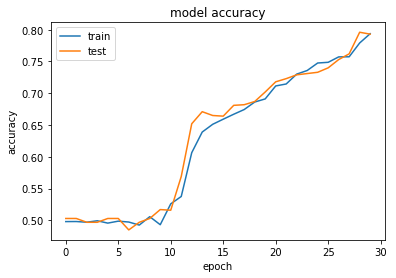

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating on Given Test Set

In [67]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, questions_test]))

32/32 [==============================] - 1s 7ms/step


In [68]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [69]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [70]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [71]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [72]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9144097


## Writing Your Own Stories and Questions

Remember you can only use words from the existing vocab

In [73]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [74]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [75]:
my_question = "Is the football in the garden ?"

In [76]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [77]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [78]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [79]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 47ms/step


In [80]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.648685
